Fetch stock market data

In [ ]:
!pip install requests # Install the requests library

import requests # Import the requests library into your script

API_KEY = "Y1QJ68XT263NMCH0"  # Replace with your API key
BASE_URL = "https://www.alphavantage.co/query"

# Parameters for the API call
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AAPL',  # Replace 'AAPL' with any stock symbol you want
    'apikey': API_KEY
}

# Fetch data from Alpha Vantage
response = requests.get(BASE_URL, params=params)
data = response.json()

# Check if data is fetched successfully
if "Time Series (Daily)" in data:
    print("Data fetched successfully!")
else:
    print("Error fetching data:", data)

Data fetched successfully!


Process stock data

In [ ]:
import pandas as pd

# Extract daily time series data
time_series = data['Time Series (Daily)']

# Prepare lists for dates and closing prices
dates = []
closing_prices = []

for date, values in time_series.items():
    dates.append(date)
    closing_prices.append(float(values['4. close']))  # Extract 'close' price

# Create a DataFrame
stock_data = pd.DataFrame({
    'Date': dates,
    'Closing Price (USD)': closing_prices
})

# Convert 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Sort data by date in ascending order
stock_data = stock_data.sort_values('Date')

# Display the first few rows of the DataFrame
print(stock_data.head())

         Date  Closing Price (USD)
99 2024-08-14               221.72
98 2024-08-15               224.72
97 2024-08-16               226.05
96 2024-08-19               225.89
95 2024-08-20               226.51


Visualize the stock data

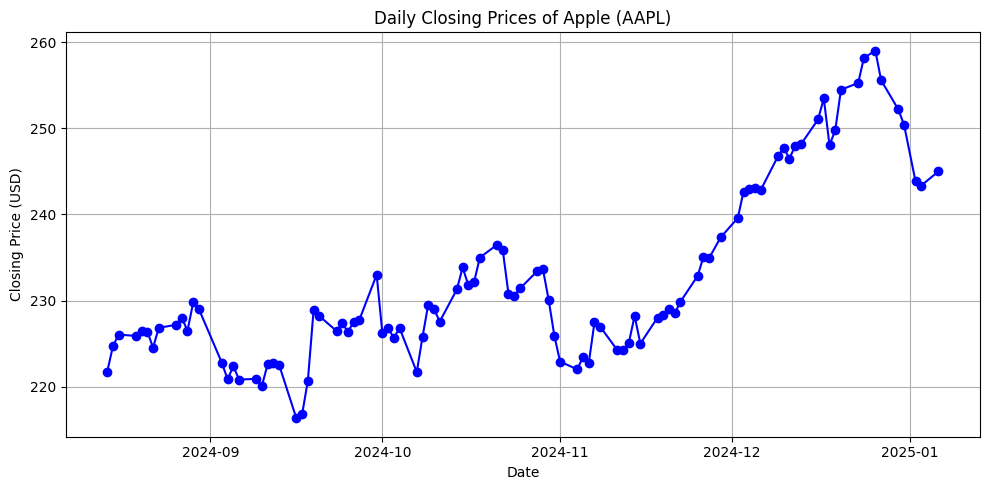

In [ ]:
import matplotlib.pyplot as plt

# Plot daily closing prices
plt.figure(figsize=(10, 5))  # Set the figure size
plt.plot(stock_data['Date'], stock_data['Closing Price (USD)'],
         marker='o', linestyle='-', color='blue')

# Add titles and labels
plt.title("Daily Closing Prices of Apple (AAPL)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Calculate percentage change

In [ ]:
# Calculate daily percentage change in closing prices
stock_data['Percentage Change (%)'] = stock_data['Closing Price (USD)'].pct_change() * 100

# Drop the first row with NaN percentage change (as there's no previous day)
stock_data = stock_data.dropna()

# Display the updated DataFrame
print(stock_data.head())

         Date  Closing Price (USD)  Percentage Change (%)
98 2024-08-15               224.72               1.353058
97 2024-08-16               226.05               0.591848
96 2024-08-19               225.89              -0.070781
95 2024-08-20               226.51               0.274470
94 2024-08-21               226.40              -0.048563


Visualize percantage change

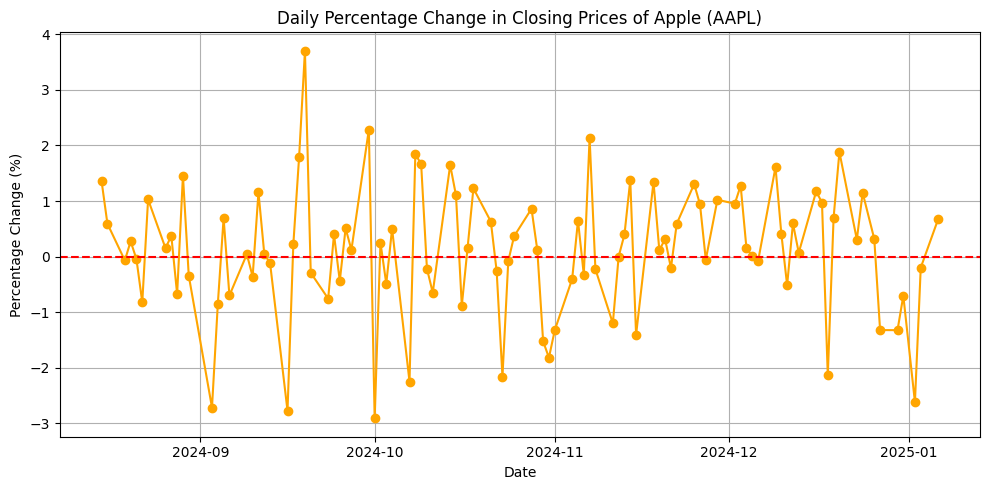

In [ ]:
# Plot percentage change
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Date'], stock_data['Percentage Change (%)'], marker='o', linestyle='-', color='orange')

# Add titles and labels
plt.title("Daily Percentage Change in Closing Prices of Apple (AAPL)")
plt.xlabel("Date")
plt.ylabel("Percentage Change (%)")
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at 0%
plt.grid(True)
plt.tight_layout()
plt.show()